# Explore here

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"


df = pd.read_csv(url, sep=";")

# Verificamos estructura
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:

# Crear columna 'label'
def convertir_label(valor):
    if valor <= 4:
        return 0  # Baja calidad
    elif valor <= 6:
        return 1  # Calidad media
    else:
        return 2  # Alta calidad

df['label'] = df['quality'].apply(convertir_label)


In [16]:
# Separar variables independientes (X) y objetivo (y)
X = df.drop(['quality', 'label'], axis=1)
y = df['label']


In [19]:
# Dividir en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [20]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Entrenar modelo KNN con k inicial
k_inicial = 5
knn = KNeighborsClassifier(n_neighbors=k_inicial)
knn.fit(X_train_scaled, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:

# Predicciones y métricas
y_pred = knn.predict(X_test_scaled)

print("🔹 Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Reporte de clasificación:\n", classification_report(y_test, y_pred))
print(f"\n🔹 Exactitud del modelo con k={k_inicial}: {accuracy_score(y_test,y_pred):.4f}")

🔹 Matriz de confusión:
 [[  0  13   0]
 [  1 243  20]
 [  0  24  19]]

🔹 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.92      0.89       264
           2       0.49      0.44      0.46        43

    accuracy                           0.82       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.78      0.82      0.80       320


🔹 Exactitud del modelo con k=5: 0.8187


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


PASO 3:

In [24]:
# Evaluar rendimiento (ya tienes y_pred calculado)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)



In [25]:

print("Exactitud (accuracy):", acc)
print("\nMatriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", cr)


Exactitud (accuracy): 0.81875

Matriz de confusión:
 [[  0  13   0]
 [  1 243  20]
 [  0  24  19]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.92      0.89       264
           2       0.49      0.44      0.46        43

    accuracy                           0.82       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.78      0.82      0.80       320



PASO 4:

In [26]:
# Optimización de k
resultados = []

for k in range(1, 21):  # k de 1 a 20
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_temp_pred = knn_temp.predict(X_test_scaled)
    acc_temp = accuracy_score(y_test, y_temp_pred)
    resultados.append(acc_temp)


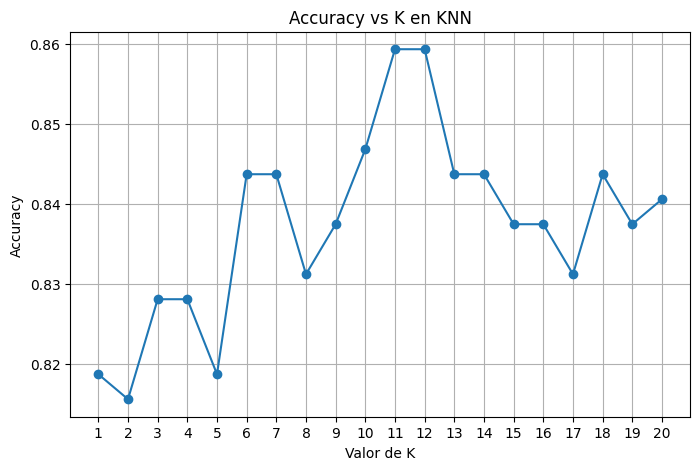

Mejor valor de K: 11 con accuracy de 0.8594


In [27]:

# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), resultados, marker='o')
plt.title("Accuracy vs K en KNN")
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Mostrar mejor K
mejor_k = resultados.index(max(resultados)) + 1
print(f"Mejor valor de K: {mejor_k} con accuracy de {max(resultados):.4f}")

In [ ]:
# Entrenar modelo con K óptimo
k_optimo = 11
knn_optimo = KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train_scaled, y_train)

# Función para predecir calidad con mensaje 
def predict_wine_quality(valores):
    """
    valores: lista o array con las características numéricas en el mismo orden que X
    """

    # Convertir y escalar
    valores = np.array(valores).reshape(1, -1)
    valores_scaled = scaler.transform(valores)
    
    # Predicción
    calidad = knn_optimo.predict(valores_scaled)[0]
    
    # resultado
    if calidad <= 4:
        return "Este vino probablemente sea de calidad baja 🍷"
    elif calidad == 5 or calidad == 6:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de calidad alta 🍷"
    

import numpy as np


print(predict_wine_quality([8.2, 0.6, 0.25, 2.1, 0.070, 14.0, 38.0, 0.9967, 3.35,0.60,10.5]))


Este vino probablemente sea de calidad baja 🍷


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
